<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#уствновим и загрузим библиотеки
install.packages('tm')
install.packages('ggplot2')
install.packages('Matrix')
install.packages('readr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library('tm')
library('ggplot2')
library('Matrix')
library('readr')

Loading required package: NLP


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




In [3]:
data <- read_csv(("/content/PubMed Multi Label Text Classification Dataset Processed.csv")) #загрузим датасет

Rows: 1761 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Title, abstractText, meshMajor, meshid, meshroot
dbl (15): pmid, A, B, C, D, E, F, G, H, I, J, L, M, N, Z

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(data) #датасет со статьями с Pubmed на разные темы, которые пересекаются с друг с другом.

Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Expression of p53 and coexistence of HPV in premalignant lesions and in cervical cancer.,"Fifty-four paraffin embedded tissue sections from patients with dysplasia (21 cases) and with cervical cancer (33 cases) were analysed. HPV was detected and identified in two stages. Firstly, using mixed starters, chosen genomic DNA sequences were amplified; secondly the material thus obtained was analyzed by hybridization method using oligonucleotyde 31-P labelled probe. HPVs of type 6, 11, 16, 18, 33 were identified. The p-53 expression was assayed by immunohistochemical method. HPV infection was often associated with dysplasia and cervical cancer. In cervical cancer mainly HPV 16 and 18 with high oncogenic potential were found. The p-53 was present rarely, and in minute quantities. No correlation was observed between presence of p-53 and HPVs DNA.","['DNA Probes, HPV', 'DNA, Viral', 'Female', 'Humans', 'Immunohistochemistry', 'Papillomaviridae', 'Tumor Suppressor Protein p53', 'Uterine Cervical Dysplasia', 'Uterine Cervical Neoplasms']",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600.223.620', 'D27.720.470.530.600.223.620'], ['D13.444.308.568'], ['B01.050.150.900.649.313.988.400.112.400.400'], ['E01.370.225.500.607.512', 'E01.370.225.750.551.512', 'E05.200.500.607.512', 'E05.200.750.551.512', 'E05.478.583', 'H01.158.100.656.234.512', 'H01.158.201.344.512', 'H01.158.201.486.512', 'H01.181.122.573.512', 'H01.181.122.605.512'], ['B04.280.210.655', 'B04.613.204.655'], ['D12.776.157.687.650', 'D12.776.260.820', 'D12.776.624.776.775', 'D12.776.660.720.650', 'D12.776.744.845'], ['C04.834.818', 'C13.351.500.852.593.074'], ['C04.588.945.418.948.850', 'C13.351.500.852.593.131', 'C13.351.500.852.762.850', 'C13.351.937.418.875.850']]","['Chemicals and Drugs [D]', 'Organisms [B]', 'Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]', 'Disciplines and Occupations [H]', 'Diseases [C]']",0,1,1,1,1,0,0,1,0,0,0,0,0,0
Vitamin D status in pregnant Indian women across trimesters and different seasons and its correlation with neonatal serum 25-hydroxyvitamin D levels.,"The present cross-sectional study was conducted to determine the vitamin D status of pregnant Indian women and their breast-fed infants. Subjects were recruited from the Department of Obstetrics, Armed Forces Clinic and Army Hospital (Research and Referral), Delhi. A total of 541 apparently healthy women with uncomplicated, single, intra-uterine gestation reporting in any trimester were consecutively recruited. Of these 541 women, 299 (first trimester, ninety-seven; second trimester, 125; third trimester, seventy-seven) were recruited in summer (April-October) and 242 (first trimester, fifty-nine, second trimester, ninety-three; third trimester, ninety) were recruited in winter (November-March) to study seasonal variations in vitamin D status. Clinical, dietary, biochemical and hormonal evaluations for the Ca-vitamin D-parathormone axis were performed. A subset of 342 mother-infant pairs was re-evaluated 6 weeks postpartum. Mean serum 25-hydroxyvitamin D (25(OH)D) of pregnant women was 23.2 (SD 12.2) nmol/l. Hypovitaminosis D (25(OH)D < 50 nmol/l) was observed in 96.3 % of the subjects. Serum 25(OH)D levels were significantly lower in winter in the second and third trimesters, while serum intact parathormone (iPTH) and alkaline phosphatase levels were significantly higher in winter in all three trimesters. A significant negative correlation was found between serum 25(OH)D and iPTH in mothers (r - 0.367, P = 0.0001) and infants (r - 0.56, P = 0.0001). A strong positive correlation was observed between 25(OH)D levels of mother-infant pairs (r 0.779, P = 0.0001). A high prevalence of hypovitaminosis D was observed in pregnancy, lactation and infancy with no significant inter-t

In [6]:
data$abstractText[[1]] # 1я статья

[1] "Fifty-four paraffin embedded tissue sections from patients with dysplasia (21 cases) and with cervical cancer (33 cases) were analysed. HPV was detected and identified in two stages. Firstly, using mixed starters, chosen genomic DNA sequences were amplified; secondly the material thus obtained was analyzed by hybridization method using oligonucleotyde 31-P labelled probe. HPVs of type 6, 11, 16, 18, 33 were identified. The p-53 expression was assayed by immunohistochemical method. HPV infection was often associated with dysplasia and cervical cancer. In cervical cancer mainly HPV 16 and 18 with high oncogenic potential were found. The p-53 was present rarely, and in minute quantities. No correlation was observed between presence of p-53 and HPVs DNA."

In [7]:
mycorpus <- Corpus(VectorSource(data$abstractText))
inspect(head(mycorpus)) # загружаем наш текст и в следующей строке кода делаем препроцессинг

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 6

[1] Fifty-four paraffin embedded tissue sections from patients with dysplasia (21 cases) and with cervical cancer (33 cases) were analysed. HPV was detected and identified in two stages. Firstly, using mixed starters, chosen genomic DNA sequences were amplified; secondly the material thus obtained was analyzed by hybridization method using oligonucleotyde 31-P labelled probe. HPVs of type 6, 11, 16, 18, 33 were identified. The p-53 expression was assayed by immunohistochemical method. HPV infection was often associated with dysplasia and cervical cancer. In cervical cancer mainly HPV 16 and 18 with high oncogenic potential were found. The p-53 was present rarely, and in minute quantities. No correlation was observed between presence of p-53 and HPVs DNA.                                                                                                                                        

In [8]:
mycorpus <- tm_map(mycorpus, tolower)
mycorpus <- tm_map(mycorpus, removePunctuation, ucp=TRUE)
mycorpus <- tm_map(mycorpus, removeNumbers)
mycorpus <- tm_map(mycorpus, removeWords, stopwords("en"))

Warning message in tm_map.SimpleCorpus(mycorpus, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(mycorpus, removePunctuation, ucp = TRUE):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(mycorpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(mycorpus, removeWords, stopwords("en")):
“transformation drops documents”


In [9]:
mycorpus[[1]]$content # текст без знаком пунктуации, больших букв, чисел, символов

[1] "fiftyfour paraffin embedded tissue sections  patients  dysplasia  cases   cervical cancer  cases  analysed hpv  detected  identified  two stages firstly using mixed starters chosen genomic dna sequences  amplified secondly  material thus obtained  analyzed  hybridization method using oligonucleotyde p labelled probe hpvs  type       identified  p expression  assayed  immunohistochemical method hpv infection  often associated  dysplasia  cervical cancer  cervical cancer mainly hpv     high oncogenic potential  found  p  present rarely   minute quantities  correlation  observed  presence  p  hpvs dna"

In [10]:
mydtm <- DocumentTermMatrix(mycorpus) #создадим мещок слов из слов в статьях

In [11]:
inspect(mydtm)

<<DocumentTermMatrix (documents: 1761, terms: 26055)>>
Non-/sparse entries: 137394/45745461
Sparsity           : 100%
Maximal term length: 60
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   cell cells group may patients results study treatment two using
  1003    0     0     0   2        0       0     0         0   1     1
  1055    7     6     0   0        0       0     1         0   1     1
  1358    0     0     5   0        0       0     0         0   1     0
  1689    0     0     0   0        0       1     0         0   1     1
  209     1     0     0   0        0       2     1         0   0     0
  37      0     1     0   0        0       0     0         0   0     1
  381     0     0     0   1        0       2     2         0   0     1
  558    15     0     0   2        0       0     2         0   0     0
  760     0     0     1   2        2       0     0         9   0     0
  805     0     0     0   0        6       0     2         0   4     2


In [12]:
document_lengths <- rowSums(as.matrix(mydtm))
word_counts <- colSums(as.matrix(mydtm))

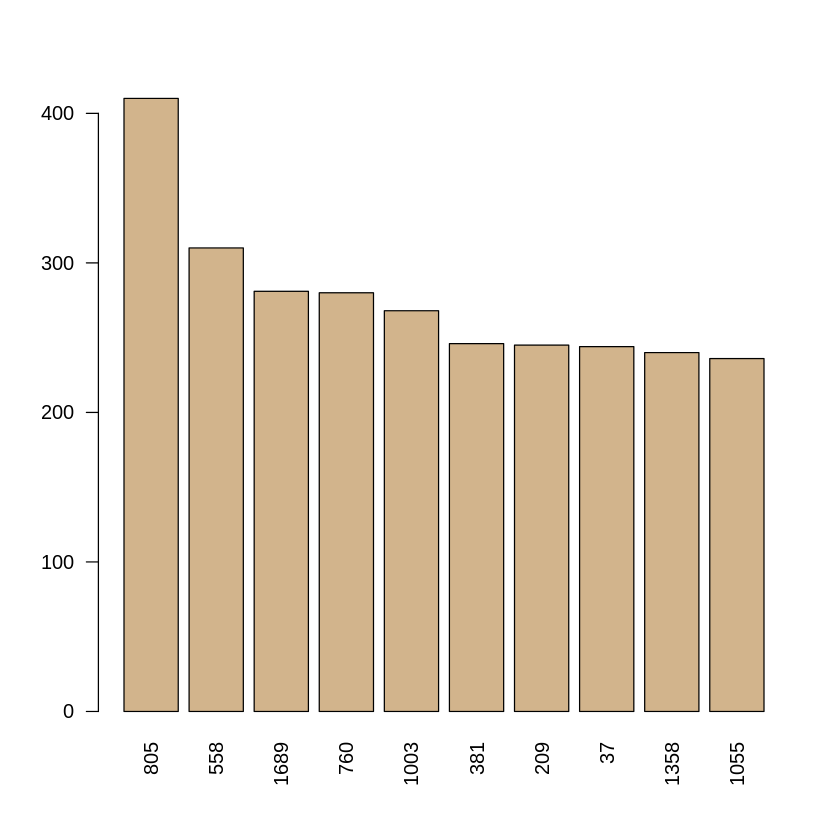

In [13]:
sorted_document_lengths <- sort(document_lengths, decreasing=TRUE)
barplot(sorted_document_lengths[1:10], col = "tan", las = 2) #отсортируем документы по кол-ву символов, длинне статьи

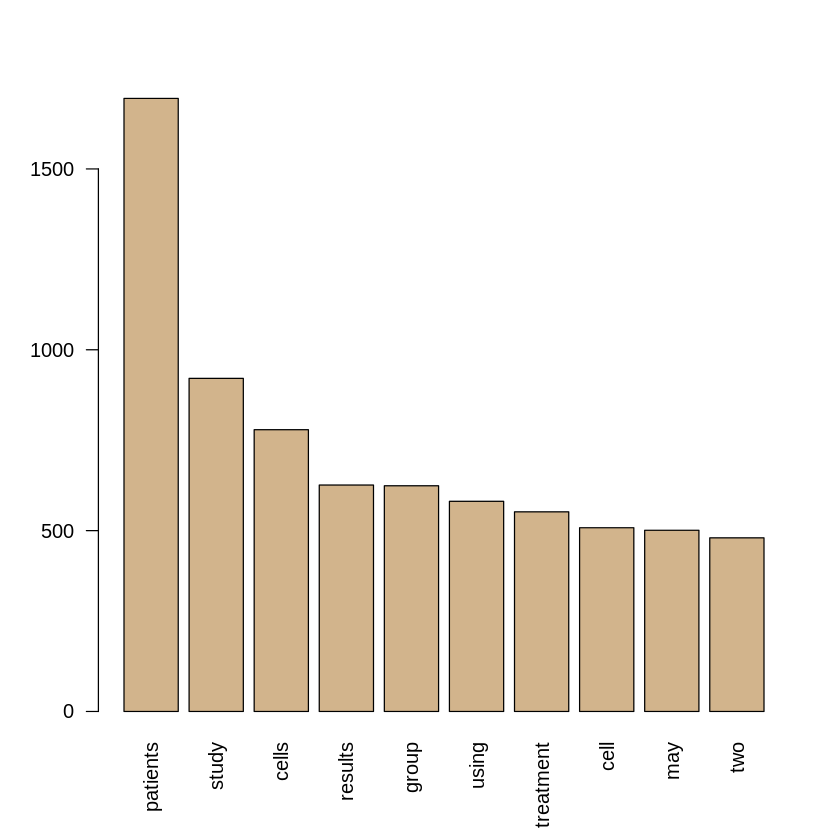

In [14]:
sorted_word_counts <- sort(word_counts, decreasing=TRUE)
barplot(sorted_word_counts[1:10], col = "tan", las = 2) #по частотк встречаемости слов

In [16]:
tfidf_dtm <- weightTfIdf(mydtm, normalize=TRUE) #tfidf

In [17]:
inspect(tfidf_dtm)

<<DocumentTermMatrix (documents: 1761, terms: 26055)>>
Non-/sparse entries: 137394/45745461
Sparsity           : 100%
Maximal term length: 60
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
      Terms
Docs   activity cases cell cells expression      group patients study treatment
  1076        0     0    0     0          0 0.00000000        0     0         0
  1123        0     0    0     0          0 0.00000000        0     0         0
  1494        0     0    0     0          0 0.00000000        0     0         0
  1689        0     0    0     0          0 0.00000000        0     0         0
  1703        0     0    0     0          0 0.00000000        0     0         0
  256         0     0    0     0          0 0.00000000        0     0         0
  597         0     0    0     0          0 0.04160934        0     0         0
  6           0     0    0     0          0 0.00000000        0     0         0
  680         0   

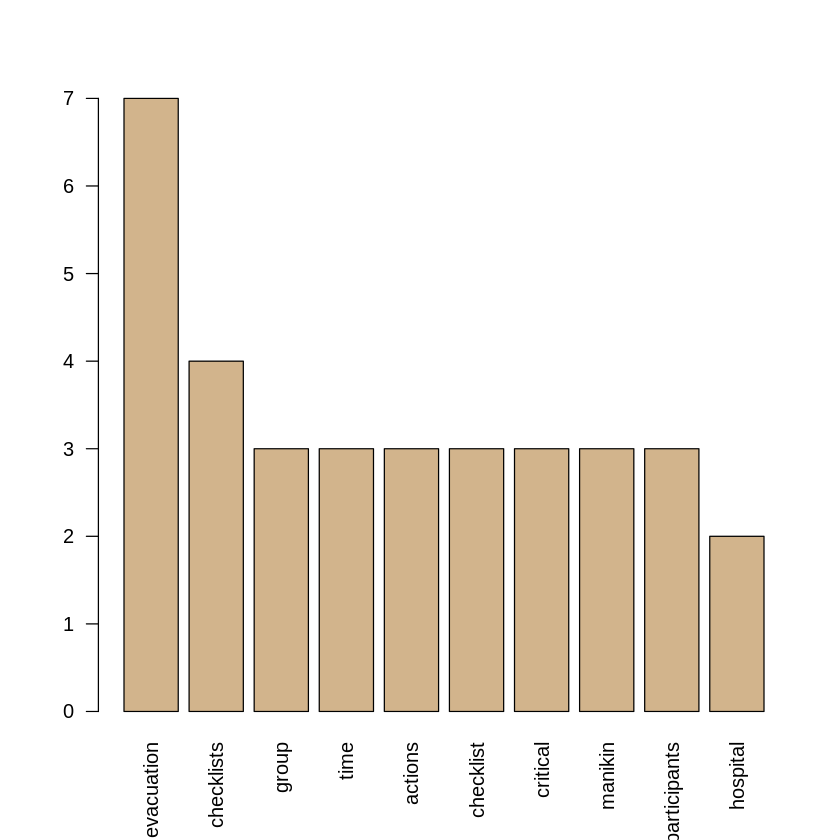

In [18]:
tf_doc10 <- as.matrix(mydtm[10,])
tf <- colSums(tf_doc10)
tfidf_doc10 <- as.matrix(tfidf_dtm[10,])
tfidf <- colSums(tfidf_doc10)
barplot(sort(tf, decreasing=TRUE)[1:10], col = "tan", las = 2)

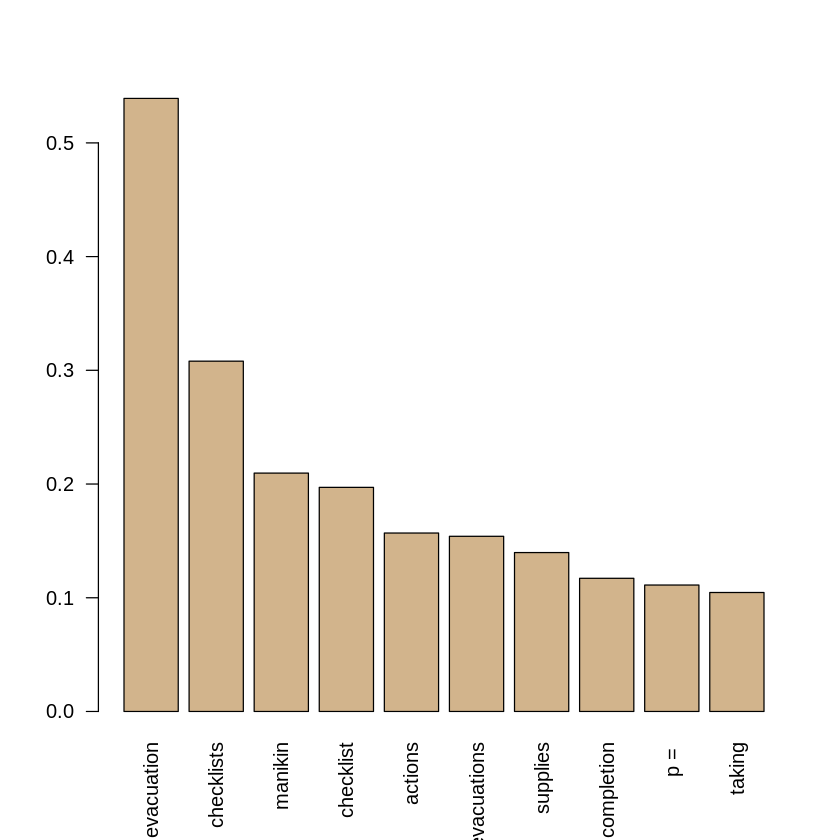

In [19]:
barplot(sort(tfidf, decreasing=TRUE)[1:10], col = "tan", las = 2) #извлечены другие признаки слов с помощью tfidf